In [1]:
import sys 
sys.path.append('../scripts/')
from robot import *
from scipy.stats import multivariate_normal

In [2]:
class Particle: ###Particle5
    def __init__(self, init_pose):
        self.pose = init_pose
        
    def motion_update(self, nu, omega, time, noise_rate_pdf): #追加
        ns = noise_rate_pdf.rvs() #順にnn, no, on, oo
        noised_nu = nu + ns[0]*math.sqrt(abs(nu)/time) + ns[1]*math.sqrt(abs(omega)/time)
        noised_omega = omega + ns[2]*math.sqrt(abs(nu)/time) + ns[3]*math.sqrt(abs(omega)/time)
        self.pose = IdealRobot.state_transition(noised_nu, noised_omega, time, self.pose)

In [3]:
class Mcl: 
    def __init__(self, init_pose, num, motion_noise_stds): 
        self.particles = [Particle(init_pose) for i in range(num)]
        
        v = motion_noise_stds
        c = np.diag([v["nn"]**2, v["no"]**2, v["on"]**2, v["oo"]**2])
        self.motion_noise_rate_pdf = multivariate_normal(cov=c)
        
    def motion_update(self, nu, omega, time): ###Mcl5###
        for p in self.particles: p.motion_update(nu, omega, time, self.motion_noise_rate_pdf)
        
    def draw(self, ax, elems): 
        xs = [p.pose[0] for p in self.particles]
        ys = [p.pose[1] for p in self.particles]
        vxs = [math.cos(p.pose[2]) for p in self.particles] 
        vys = [math.sin(p.pose[2]) for p in self.particles] 
        elems.append(ax.quiver(xs, ys, vxs, vys, color="blue", alpha=0.5))

In [4]:
class EstimationAgent(Agent):        ###EstimationAgent5
    def __init__(self, time_interval, nu, omega, estimator):
        super().__init__(nu, omega)
        self.estimator = estimator
        self.time_interval = time_interval
        
        self.prev_nu = 0.0       #追加
        self.prev_omega = 0.0 #追加
        
    def decision(self, observation=None): #追加
        self.estimator.motion_update(self.prev_nu, self.prev_omega, self.time_interval)
        self.prev_nu, self.prev_omega = self.nu, self.omega
        return self.nu, self.omega
        
    def draw(self, ax, elems):
        self.estimator.draw(ax, elems)

In [5]:
initial_pose = np.array([0, 0, 0]).T   ###mcl5_test（下の出力の先頭数行を記載）
estimator = Mcl(initial_pose, 100, motion_noise_stds={"nn":0.01, "no":0.02, "on":0.03, "oo":0.04})
a = EstimationAgent(0.1, 0.2, 10.0/180*math.pi, estimator)
estimator.motion_update(0.2, 10.0/180*math.pi, 0.1)
for p in estimator.particles:
    print(p.pose)

[0.02155347 0.00017083 0.01585132]
[2.56961683e-02 5.55280916e-05 4.32188991e-03]
[0.01892149 0.00016595 0.01754097]
[1.38771870e-02 7.39013350e-05 1.06506652e-02]
[0.02078751 0.00028821 0.02772784]
[0.0232224  0.00016332 0.01406511]
[0.02135822 0.00025247 0.02364046]
[1.60513738e-02 7.65963917e-05 9.54383234e-03]
[0.01596201 0.00010013 0.01254612]
[0.02844307 0.00018097 0.01272515]
[0.01491813 0.00012203 0.01635999]
[0.01724966 0.00015491 0.01796   ]
[0.02348456 0.00014709 0.01252668]
[0.01646149 0.00017345 0.02107272]
[0.01956793 0.00018065 0.01846343]
[0.02189612 0.00022206 0.02028246]
[0.01732875 0.00017475 0.02016825]
[0.02216198 0.00026429 0.02385001]
[0.02190161 0.0003352  0.03060703]
[0.01151561 0.00010154 0.01763555]
[0.01800102 0.00014655 0.01628239]
[0.01889254 0.00021634 0.0229007 ]
[0.02152221 0.00031357 0.029137  ]
[0.01740172 0.00016439 0.0188926 ]
[0.02140499 0.00022535 0.02105487]
[0.01890755 0.00019578 0.02070794]
[0.02274417 0.00021606 0.01899875]
[0.02461589 0.00019

<IPython.core.display.Javascript object>


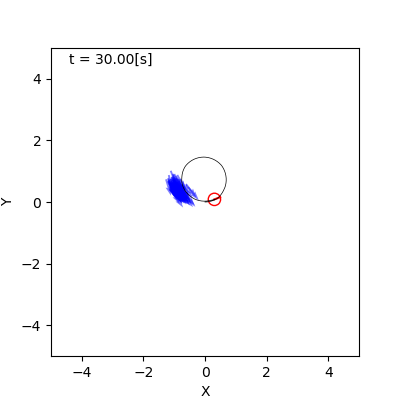

In [12]:
def trial(motion_noise_stds): ###draw_mcl5###（下の絵も）
    time_interval = 0.1 
    world = World(30, time_interval) 

    initial_pose = np.array([0, 0, 0]).T
    estimator = Mcl(initial_pose, 100, motion_noise_stds)
    circling = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, estimator)
    r = Robot(initial_pose, sensor=None, agent=circling, color="red" )
    world.append(r)

    world.draw()
    
trial({"nn":0.01, "no":0.02, "on":0.03, "oo":0.04})

In [7]:
#trial({"nn":0.001, "no":0.002, "on":0.003, "oo":0.004})

In [8]:
#trial({"nn":1, "no":2, "on":3, "oo":4})

<IPython.core.display.Javascript object>


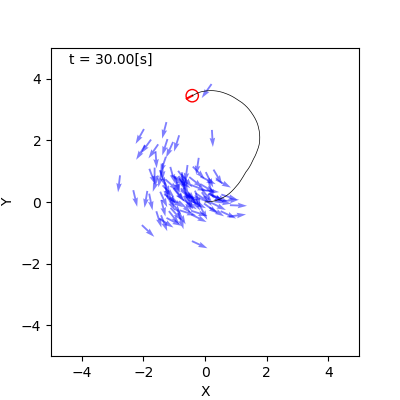

In [9]:
trial({"nn":0.19, "no":0.001, "on":0.13, "oo":0.2})

In [10]:
def trial(motion_noise_stds): ###draw_mcl5###（下の絵も）
    time_interval = 0.1 
    world = World(40, time_interval) 

    initial_pose = np.array([0, 0, 0]).T
    estimator = Mcl(initial_pose, 100, motion_noise_stds)
    circling = EstimationAgent(time_interval, 0.1, 0.0, estimator)
    r = Robot(initial_pose, sensor=None, agent=circling, color="red" )
    world.append(r)

    world.draw()

#trial({"nn":0.001, "no":0.001, "on":0.13, "oo":0.001})